In [1]:
from network_evaluation_tools import gene_conversion_tools as gct
from network_evaluation_tools import data_import_tools as dit
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
wd = '/cellar/users/snwright/Data/Network_Analysis/'

# Version 2.0
## Load PID Raw Data
#### Source: http://www.pathwaycommons.org/archives/PC2/v11/PathwayCommons11.pid.hgnc.sif.gz
Downloaded: Nov 16, 2021  
Last updated (via Pathway Commons v11 datasources.txt file): Jan 24, 2019   
Note: The text file has more lines than the sif file in Pathway Commons. However, the text file has some interactions that are unclear how to resolve so for this case we will use the sif file provided by Pathway Commons  
Also note: This network contains some interacions with CHEBI small molecules. These interactions will be removed

In [12]:
PID_Raw_v2 = pd.read_csv(wd+'Network_Data_Raw/PathwayCommons/PathwayCommons11.pid.hgnc.sif.gz',sep='\t', header=None)
print('Raw interactions in NCI PID:', PID_Raw_v2.shape[0])

Raw interactions in NCI PID: 28639


In [13]:
# Filter all interactions that contain a CHEBI: item
PID_filt_v2 = PID_Raw_v2[(~PID_Raw_v2[0].str.contains(':')) & (~PID_Raw_v2[2].str.contains(':'))]
PID_edgelist_v2 = PID_filt_v2[[0, 2]].values.tolist()
print('Protein-Protein interactions in NCI PID:', len(PID_edgelist_v2))

Protein-Protein interactions in NCI PID: 27209


In [14]:
# Sort each edge representation for filtering
PID_edgelist_sorted_v2 = [sorted(edge) for edge in PID_edgelist_v2]
PID_edgelist_sorted_df_v2 = pd.DataFrame(PID_edgelist_sorted_v2, columns=["symbol_n1", "symbol_n2"])

In [15]:
# Filter edgelist for duplicate nodes and for self-edges
PID_edgelist_filt_v2 = gct.filter_converted_edgelist(PID_edgelist_sorted_df_v2)

27209 input edges
0 self-edges removed
0 edges with un-mapped genes removed
5999 duplicate edges removed
Edge list filtered: 0.01 seconds
21210 Edges remaining


In [16]:
# Save genelist to file
gct.write_edgelist(PID_edgelist_filt_v2, wd+'/Processed_Data/PID_Symbol_v11.sif')

Edge list saved: 0.06 seconds


# Version 1.0 (original)
## Load PID Raw Data
#### Source: http://www.pathwaycommons.org/archives/PC2/v9/PathwayCommons9.pid.hgnc.sif.gz
Downloaded: June 19, 2017  
Last (via Pathway Commons v9 datasources.txt file): May 25, 2017   
Note: The text file has more lines than the sif file in Pathway Commons. However, the text file has some interactions that are unclear how to resolve so for this case we will use the sif file provided by Pathway Commons  
Also note: This network contains some interacions with CHEBI small molecules. These interactions will be removed

In [5]:
PID_Raw = pd.read_csv(wd+'Network_Data_Raw/PathwayCommons/jk_PathwayCommons9.pid.hgnc.sif',sep='\t', header=None)
print('Raw interactions in NCI PID:', PID_Raw.shape[0])

Raw interactions in NCI PID: 28920


In [7]:
# Filter all interactions that contain a CHEBI: item
PID_filt = PID_Raw[(~PID_Raw[0].str.contains(':')) & (~PID_Raw[2].str.contains(':'))]
PID_edgelist = PID_filt[[0, 2]].values.tolist()
print('Protein-Protein interactions in NCI PID:', len(PID_edgelist))

Protein-Protein interactions in NCI PID: 27489


In [9]:
# Sort each edge representation for filtering
PID_edgelist_sorted = [sorted(edge) for edge in PID_edgelist]
PID_edgelist_sorted_df = pd.DataFrame(PID_edgelist_sorted, columns=["symbol_n1", "symbol_n2"])

In [10]:
# Filter edgelist for duplicate nodes and for self-edges
PID_edgelist_filt = gct.filter_converted_edgelist(PID_edgelist_sorted_df)

27489 input edges
0 self-edges removed
0 edges with un-mapped genes removed
6047 duplicate edges removed
Edge list filtered: 0.01 seconds
21442 Edges remaining


In [11]:
# Save genelist to file
gct.write_edgelist(PID_edgelist_filt, wd+'/Processed_Data/PID_Symbol_v9.sif')

Edge list saved: 0.07 seconds


# Changes

In [17]:
stats = pd.DataFrame({"v1":[28920, 27489, 21442], 
                           "v2":[28639, 27209,21210]},
                           index=["input", "no CHEBI", "filtered"])

In [18]:
nodes_v1 = set(np.array(PID_edgelist_filt)[:, 0]).union(set(np.array(PID_edgelist_filt)[:, 1]))
nodes_v2 = set(np.array(PID_edgelist_filt_v2)[:, 0]).union(set(np.array(PID_edgelist_filt_v2)[:, 1]))

Text(0, 0.5, 'Number of nodes')

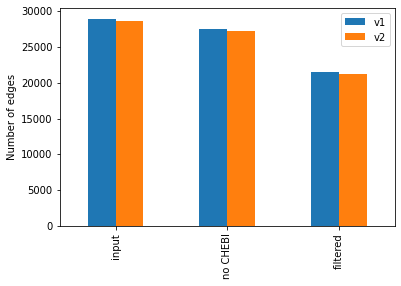

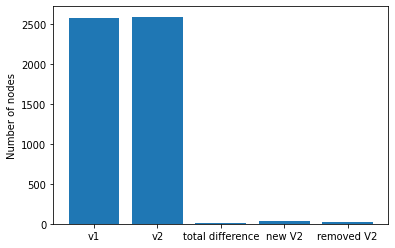

In [19]:
stats.plot.bar(ylabel="Number of edges")
plt.figure()
plt.bar(["v1", "v2", "total difference", "new V2", "removed V2"], [len(nodes_v1), len(nodes_v2), len(nodes_v2)-len(nodes_v1),
                                                           len(nodes_v2.difference(nodes_v1)), len(nodes_v1.difference(nodes_v2))])
plt.ylabel("Number of nodes")